# <font color="red"><center>Tâche 1 :</center></font>
# <font color="green"><center>Introduction</center></font>

__L'analyse des sentiments est un pilier fondamental de l'analyse des données textuelles, visant à décoder l'orientation émotionnelle d'un texte, que ce dernier soit un avis sur un produit, une critique de film ou un message sur les réseaux sociaux. Ce projet se focalise sur le développement d'un modèle de classification des sentiments dont l'objectif est de déterminer si un texte exprime un sentiment positif ou négatif.__

__L'ensemble de données à notre disposition consiste en des phrases étiquetées en tant que positives ou négatives, collectées à partir de diverses sources en ligne telles qu'imdb.com, amazon.com et yelp.com. Ces phrases ont été sélectionnées méticuleusement pour refléter des connotations émotionnelles claires, écartant ainsi toute forme de neutralité.__

# <font color="red"><center>Tâche 2 :</center></font>
# <font color="green"><center>Importation des Bibliothèques</center></font>

<center>Avant de commencer, j'importe toutes les bibliothèques Python dont j'aurai besoin durant ce projet.</center>

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import PorterStemmer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Boubacar
[nltk_data]     SOW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Boubacar
[nltk_data]     SOW\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# <font color="red"><center>Tâche 3:</center></font>
# <font color="green"><center>3.1 Collecte des Données</center></font>

La collecte de données est un processus crucial dans le domaine de la science des données. Elle implique la réunion, l'acquisition et l'agrégation d'informations provenant de diverses sources afin d'alimenter des analyses.


In [2]:

# Remplacez 'votre_fichier.txt' par le chemin vers votre fichier texte.
fichier_texte = 'imdb.txt'

# Lire le fichier texte en utilisant le délimiteur '\t' pour séparer les phrases et les sentiments.
df1 = pd.read_csv(fichier_texte, sep='\t', header=None, names=['Phrase', 'Sentiment'])

# Afficher le DataFrame.
print(df1)
df1.shape


                                                Phrase  Sentiment
0    A very, very, very slow-moving, aimless movie ...          0
1    Not sure who was more lost - the flat characte...          0
2    Attempting artiness with black & white and cle...          0
3         Very little music or anything to speak of.            0
4    The best scene in the movie was when Gerardo i...          1
..                                                 ...        ...
743  I just got bored watching Jessice Lange take h...          0
744  Unfortunately, any virtue in this film's produ...          0
745                   In a word, it is embarrassing.            0
746                               Exceptionally bad!            0
747  All in all its an insult to one's intelligence...          0

[748 rows x 2 columns]


(748, 2)

In [3]:
import matplotlib.pyplot as plt

# Créez un sous-ensemble de données pour les sentiments positifs (1)
positive_sentiments = df1[df1['Sentiment'] == 1]

# Créez un sous-ensemble de données pour les sentiments négatifs (0)
negative_sentiments = df1[df1['Sentiment'] == 0]

# Comptez le nombre de lignes pour chaque sentiment
positive_count = len(positive_sentiments)
negative_count = len(negative_sentiments)

# Créez une liste d'étiquettes de sentiment
sentiment_labels = ['Positif', 'Négatif']

# Créez une liste de comptage des sentiments
sentiment_counts = [positive_count, negative_count]
# Spécifiez les couleurs
colors = ['green', 'red']

# Créez un graphique à barres avec des couleurs personnalisées
plt.bar(sentiment_labels, sentiment_counts, color=colors)


# Ajoutez des titres et des étiquettes
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Phrases')

# Affichez le graphique
plt.show()


In [4]:
# Compter les occurrences de 0 et 1 dans la colonne 'Sentiment'.
comptage = df1['Sentiment'].value_counts()

# Afficher le résultat.
print(comptage)

1    386
0    362
Name: Sentiment, dtype: int64


In [5]:
fichier_texte = 'amazon.txt'

# Lire le fichier texte en utilisant le délimiteur '\t' pour séparer les phrases et les sentiments.
df2 = pd.read_csv(fichier_texte, sep='\t', header=None, names=['Phrase', 'Sentiment'])

# Afficher le DataFrame.
print(df2)
df2.shape
# Compter les occurrences de 0 et 1 dans la colonne 'Sentiment'.
comptage = df2['Sentiment'].value_counts()

# Afficher le résultat.
print(comptage)

                                                Phrase  Sentiment
0    So there is no way for me to plug it in here i...          0
1                          Good case, Excellent value.          1
2                               Great for the jawbone.          1
3    Tied to charger for conversations lasting more...          0
4                                    The mic is great.          1
..                                                 ...        ...
995  The screen does get smudged easily because it ...          0
996  What a piece of junk.. I lose more calls on th...          0
997                       Item Does Not Match Picture.          0
998  The only thing that disappoint me is the infra...          0
999  You can not answer calls with the unit, never ...          0

[1000 rows x 2 columns]
0    500
1    500
Name: Sentiment, dtype: int64


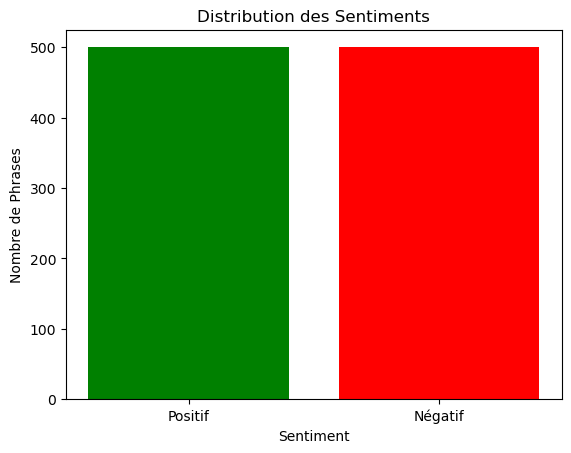

In [6]:
import matplotlib.pyplot as plt

# Créez un sous-ensemble de données pour les sentiments positifs (1)
positive_sentiments = df2[df2['Sentiment'] == 1]

# Créez un sous-ensemble de données pour les sentiments négatifs (0)
negative_sentiments = df2[df2['Sentiment'] == 0]

# Comptez le nombre de lignes pour chaque sentiment
positive_count = len(positive_sentiments)
negative_count = len(negative_sentiments)

# Créez une liste d'étiquettes de sentiment
sentiment_labels = ['Positif', 'Négatif']

# Créez une liste de comptage des sentiments
sentiment_counts = [positive_count, negative_count]
# Spécifiez les couleurs
colors = ['green', 'red']

# Créez un graphique à barres avec des couleurs personnalisées
plt.bar(sentiment_labels, sentiment_counts, color=colors)


# Ajoutez des titres et des étiquettes
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Phrases')

# Affichez le graphique
plt.show()

In [7]:
fichier_texte = 'yelp.txt'

# Lire le fichier texte en utilisant le délimiteur '\t' pour séparer les phrases et les sentiments.
df3 = pd.read_csv(fichier_texte, sep='\t', header=None, names=['Phrase', 'Sentiment'])

# Afficher le DataFrame.
print(df3)
df3.shape

# Compter les occurrences de 0 et 1 dans la colonne 'Sentiment'.
comptage = df3['Sentiment'].value_counts()

# Afficher le résultat.
print(comptage)

                                                Phrase  Sentiment
0                             Wow... Loved this place.          1
1                                   Crust is not good.          0
2            Not tasty and the texture was just nasty.          0
3    Stopped by during the late May bank holiday of...          1
4    The selection on the menu was great and so wer...          1
..                                                 ...        ...
995  I think food should have flavor and texture an...          0
996                           Appetite instantly gone.          0
997  Overall I was not impressed and would not go b...          0
998  The whole experience was underwhelming, and I ...          0
999  Then, as if I hadn't wasted enough of my life ...          0

[1000 rows x 2 columns]
1    500
0    500
Name: Sentiment, dtype: int64


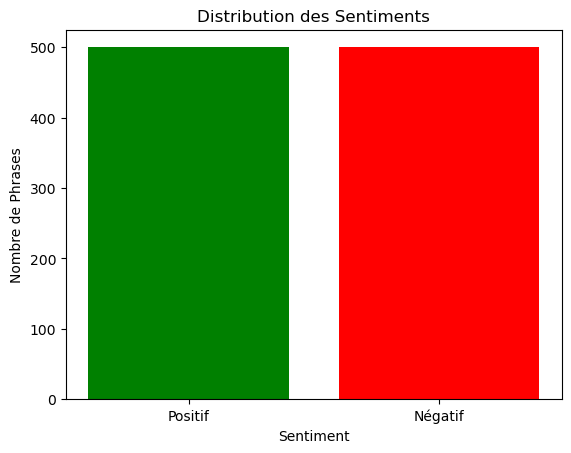

In [8]:
import matplotlib.pyplot as plt

# Créez un sous-ensemble de données pour les sentiments positifs (1)
positive_sentiments = df3[df3['Sentiment'] == 1]

# Créez un sous-ensemble de données pour les sentiments négatifs (0)
negative_sentiments = df3[df3['Sentiment'] == 0]

# Comptez le nombre de lignes pour chaque sentiment
positive_count = len(positive_sentiments)
negative_count = len(negative_sentiments)

# Créez une liste d'étiquettes de sentiment
sentiment_labels = ['Positif', 'Négatif']

# Créez une liste de comptage des sentiments
sentiment_counts = [positive_count, negative_count]
# Spécifiez les couleurs
colors = ['green', 'red']

# Créez un graphique à barres avec des couleurs personnalisées
plt.bar(sentiment_labels, sentiment_counts, color=colors)


# Ajoutez des titres et des étiquettes
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Phrases')

# Affichez le graphique
plt.show()

In [9]:
import pandas as pd

# Supposons que vous ayez trois DataFrames df1, df2 et df3, chacun avec 1000 lignes.

# Concaténez-les verticalement.
concatenated_df = pd.concat([df1, df2, df3], ignore_index=True)

# Le paramètre ignore_index=True réindexera le DataFrame résultant pour qu'il ait des index continus.

# Maintenant, concatenated_df contient 3000 lignes et les mêmes colonnes que les trois DataFrames.
concatenated_df

Phrase  Sentiment
0     A very, very, very slow-moving, aimless movie ...          0
1     Not sure who was more lost - the flat characte...          0
2     Attempting artiness with black & white and cle...          0
3          Very little music or anything to speak of.            0
4     The best scene in the movie was when Gerardo i...          1
...                                                 ...        ...
2743  I think food should have flavor and texture an...          0
2744                           Appetite instantly gone.          0
2745  Overall I was not impressed and would not go b...          0
2746  The whole experience was underwhelming, and I ...          0
2747  Then, as if I hadn't wasted enough of my life ...          0

[2748 rows x 2 columns]

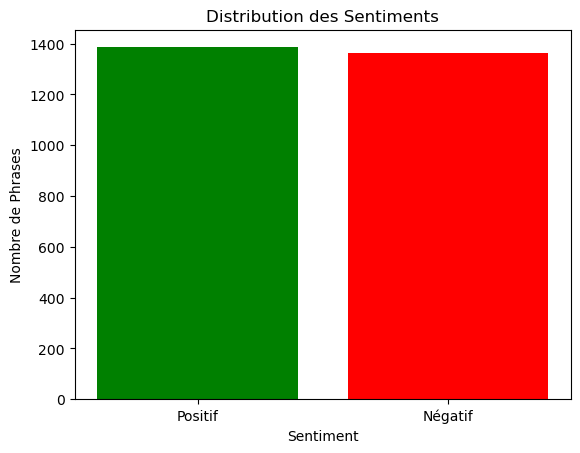

In [10]:
import matplotlib.pyplot as plt

# Créez un sous-ensemble de données pour les sentiments positifs (1)
positive_sentiments = concatenated_df[concatenated_df['Sentiment'] == 1]

# Créez un sous-ensemble de données pour les sentiments négatifs (0)
negative_sentiments = concatenated_df[concatenated_df['Sentiment'] == 0]

# Comptez le nombre de lignes pour chaque sentiment
positive_count = len(positive_sentiments)
negative_count = len(negative_sentiments)

# Créez une liste d'étiquettes de sentiment
sentiment_labels = ['Positif', 'Négatif']

# Créez une liste de comptage des sentiments
sentiment_counts = [positive_count, negative_count]

# Spécifiez les couleurs
colors = ['green', 'red']

# Créez un graphique à barres avec des couleurs personnalisées
plt.bar(sentiment_labels, sentiment_counts, color=colors)

# Ajoutez des titres et des étiquettes
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Phrases')

# Affichez le graphique
plt.show()


# <font color="green"><center>3.2 Analyses descriptif du jeu de données</center></font>

In [11]:
df = concatenated_df

In [12]:
df.head()

Phrase  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [13]:
# Affiche les 5 dernières lignes par défaut
df.tail()  


Phrase  Sentiment
2743  I think food should have flavor and texture an...          0
2744                           Appetite instantly gone.          0
2745  Overall I was not impressed and would not go b...          0
2746  The whole experience was underwhelming, and I ...          0
2747  Then, as if I hadn't wasted enough of my life ...          0

In [14]:
df.shape

(2748, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Phrase     2748 non-null   object
 1   Sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [16]:
#Quel est le nombre de dimension dans le jeu de données?

df.columns


Index(['Phrase', 'Sentiment'], dtype='object')

In [17]:
print(df.describe())


         Sentiment
count  2748.000000
mean      0.504367
std       0.500072
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [18]:
duplicates = df.duplicated().sum()
print(duplicates)

17


In [19]:
# Identifier les lignes dupliquées
# Utilisation de keep=False pour marquer toutes les occurrences dupliquées
doublons = df[df.duplicated(keep=False)]

print("Lignes en double :\n", doublons)

Lignes en double :
                                                  Phrase  Sentiment
29                     Definitely worth checking out.            1
64                                              10/10            1
165                    Definitely worth checking out.            1
374                                  Not recommended.            0
387                                  Not recommended.            0
590                                             10/10            1
766                                       Works great!.          1
927   If you like a loud buzzing to override all you...          0
928                             Don't buy this product.          0
935                                       Great phone!.          1
1010                                       Works great.          1
1033                                      Great phone!.          1
1038                                       Great Phone.          1
1140                              This is 

In [20]:
df=df.drop_duplicates()
df

Phrase  Sentiment
0     A very, very, very slow-moving, aimless movie ...          0
1     Not sure who was more lost - the flat characte...          0
2     Attempting artiness with black & white and cle...          0
3          Very little music or anything to speak of.            0
4     The best scene in the movie was when Gerardo i...          1
...                                                 ...        ...
2743  I think food should have flavor and texture an...          0
2744                           Appetite instantly gone.          0
2745  Overall I was not impressed and would not go b...          0
2746  The whole experience was underwhelming, and I ...          0
2747  Then, as if I hadn't wasted enough of my life ...          0

[2731 rows x 2 columns]

In [21]:
# 

df.shape

(2731, 2)

__<center>Il y a 17 phrases en double, donc je les ai supprimées. Afin d'améliorer mon analyse et de garantir l'obtention de résultats plus précis et fiables, j'ai pris cette mesure.</center>__

In [22]:
df.isna().sum()

Phrase       0
Sentiment    0
dtype: int64

In [23]:
 df.columns

Index(['Phrase', 'Sentiment'], dtype='object')

In [24]:
df['Sentiment'].unique()


array([0, 1], dtype=int64)

In [25]:
# Compter les occurrences de 0 et 1 dans la colonne 'Sentiment'.
comptage = df['Sentiment'].value_counts()

# Afficher le résultat.
print(comptage)

1    1376
0    1355
Name: Sentiment, dtype: int64


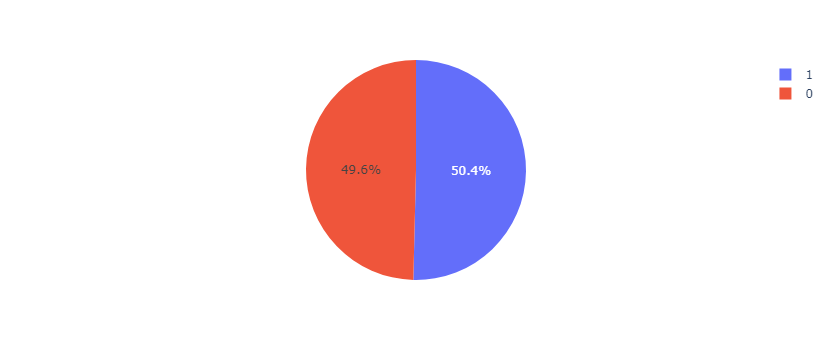

In [26]:
import plotly.express as px

# Compter les occurrences de chaque sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Créer le graphique circulaire avec Plotly Express
fig = px.pie(names=sentiment_counts.index, values=sentiment_counts.values)
fig.show()


# <font color="green"><center>Conclusion pour l'analyse descriptive du jeu de données :</center></font>
__<center>Ce jeu de données comprend 2731 phrases, réparties en 1376 phrases positives et 1355 phrases négatives, indiquant ainsi une répartition de 50,4 % de sentiments positifs et 49,6 % de sentiments négatifs, sans présence de valeurs manquantes pour les phrases ou les sentiments.</center>__

# <font color="red"><center>Tâche 4:</center></font>
# <font color="green"><center>Prétraitement des Données :</center></font>

__<center>Ce processus de prétraitement des données pour l'analyse du sentiment garantit la qualité des données d'entrée et facilite l'application des méthodes d'analyse textuelle, contribuant ainsi à des interprétations plus précises et pertinentes des sentiments exprimés dans le texte.</center>__

# <font color="green"><center>4.1 Nettoyage des données</center></font>

<center> Convertir en minuscules et suppression de la ponctuation:</center>

In [27]:
df['Phrase'] = df['Phrase'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

 
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\3039276307.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment
0     a very very very slowmoving aimless movie abou...          0
1     not sure who was more lost  the flat character...          0
2     attempting artiness with black  white and clev...          0
3           very little music or anything to speak of            0
4     the best scene in the movie was when gerardo i...          1
...                                                 ...        ...
2743  i think food should have flavor and texture an...          0
2744                            appetite instantly gone          0
2745  overall i was not impressed and would not go back          0
2746  the whole experience was underwhelming and i t...          0
2747  then as if i hadnt wasted enough of my life th...          0

[2731 rows x 2 columns]

# <font color="green"><center>4.2 la suppression des valeurs numériques</center></font>

In [28]:
def supprimer_numeriques(phrase):
    return re.sub(r'\d+', '', phrase)

# Appliquer la fonction à la colonne 'Phrase' du DataFrame
df['Phrase'] = df['Phrase'].apply(supprimer_numeriques)

# Afficher les phrases nettoyées sans valeurs numériques
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\1115346245.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment
0     a very very very slowmoving aimless movie abou...          0
1     not sure who was more lost  the flat character...          0
2     attempting artiness with black  white and clev...          0
3           very little music or anything to speak of            0
4     the best scene in the movie was when gerardo i...          1
...                                                 ...        ...
2743  i think food should have flavor and texture an...          0
2744                            appetite instantly gone          0
2745  overall i was not impressed and would not go back          0
2746  the whole experience was underwhelming and i t...          0
2747  then as if i hadnt wasted enough of my life th...          0

[2731 rows x 2 columns]

# <font color="green"><center>4.3 Tokenisation par mot</center></font>

__<center>Cette méthode fragmente le texte en mots individuels, permettant ainsi de traiter chaque mot comme un "token" pour évaluer le sentiment associé.
En extrayant ces "tokens", l'analyse de sentiment peut attribuer des valeurs émotionnelles à chaque mot, facilitant ainsi la détermination du ton général du texte.
Cette approche de tokenisation par mot est cruciale pour décoder les nuances et les subtilités du langage dans l'analyse de sentiment, offrant ainsi une compréhension fine des émotions véhiculées dans un texte.</center>__

In [29]:
df['Tokens'] = df['Phrase'].apply(lambda x: x.split())
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\3373875705.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  
0     [a, very, very, very, slowmoving, aimless, mov...  
1     [not, sure, who, was, more, lost, the, flat, c...  
2     [attempting, artiness, with, black, white, and...  
3     [very, little, music, or, anything, to, speak,...  
4     [the, best, scene, in, the, movie, was, when, ...  
...                                                 ...  
2743  [i, think, food, should, have, flavor, and, te...  
2744                        [appetite, instantly, gone]  
2745  [overall, i, was, not, impressed, and, would, ...  
2746  [the, whole, experience, was, underwhelming, a...  
2747  [then, as, if, i, hadnt, wasted, enough, of, m...  

[2731 rows x 3 columns]

# <font color="green"><center>4.4 Suppression des mots vides</center></font>

__La suppression des mots vides en anglais, également appelée stop words removal, est une étape clé de la tokenisation par mot pour l'analyse de sentiment. En éliminant des termes courants tels que "the", "is", "and", qui ont peu de valeur sémantique, cette suppression permet de se concentrer sur les mots clés porteurs de sens et d'émotion dans le texte. En réduisant le bruit et en mettant l'accent sur les termes pertinents, cette méthode améliore la compréhension du ton émotionnel du texte. Cette approche plus précise aide à capturer de manière fiable l'intention et l'émotion du texte. En combinant la tokenisation par mot avec la suppression des mots vides, l'analyse de sentiment devient plus efficace en identifiant les éléments textuels essentiels pour évaluer de manière plus précise le sentiment exprimé.__

In [30]:
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\1702429879.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  
0     [slowmoving, aimless, movie, distressed, drift...  
1     [sure, lost, flat, characters, audience, nearl...  
2     [attempting, artiness, black, white, clever, c...  
3                      [little, music, anything, speak]  
4     [best, scene, movie, gerardo, trying, find, so...  
...                                                 ...  
2743            [think, food, flavor, texture, lacking]  
2744                        [appetite, instantly, gone]  
2745              [overall, impressed, would, go, back]  
2746  [whole, experience, underwhelming, think, well...  
2747  [hadnt, wasted, enough, life, poured, salt, wo...  

[2731 rows x 3 columns]

In [31]:
# <font color="green"><center>4.4 la suppression des valeurs numériques</center></font>

In [32]:
#df['Tokens'] = df['Tokens'].apply(lambda x: list(filter(None, x)))
#def remove_numeric(words):
   # return [word for word in words if not word.isdigit()]

# Appliquer la fonction à la colonne 'Tokens'
#df['Tokens'] = df['Tokens'].apply(lambda x: remove_numeric(x))
#df

# <font color="green"><center>4.5 Tokenisation par phrase</center></font>

__La colonne "Phrase" du DataFrame est organisée de manière à ce que chaque ligne représente une phrase distincte et complète. Chaque élément de cette colonne constitue une unité textuelle autonome, suggérant ainsi implicitement une tokenisation par phrase. Ces phrases ont subi une étape préalable de nettoyage pour éliminer le bruit et améliorer la qualité du texte.__

__Du fait que chaque ligne de la colonne "Phrase" contient une phrase indépendante, et que ces phrases ont été préalablement nettoyées pour éliminer les incohérences, il n'est pas nécessaire d'entreprendre une tokenisation par phrase supplémentaire. La colonne "Phrase" peut être considérée comme étant déjà divisée en phrases individuelles et prête à être directement utilisée pour des analyses textuelles ultérieures, ce qui évite ainsi la nécessité d'une étape supplémentaire de tokenisation par phrase.__

In [33]:
df

Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  
0     [slowmoving, aimless, movie, distressed, drift...  
1     [sure, lost, flat, characters, audience, nearl...  
2     [attempting, artiness, black, white, clever, c...  
3                      [little, music, anything, speak]  
4     [best, scene, movie, gerardo, trying, find, so...  
...                                                 ...  
2743            [think, food, flavor, texture, lacking]  
2744                        [appetite, instantly, gone]  
2745              [overall, impressed, would, go, back]  
2746  [whole, experience, underwhelming, think, well...  
2747  [hadnt, wasted, enough, life, poured, salt, wo...  

[2731 rows x 3 columns]

# <font color="green"><center>4.5  Lemmatisation:</center></font>

<center> Convertir en minuscules et suppression de la ponctuation:</center>

In [34]:
lemmatizer = WordNetLemmatizer()
df['Lemmatized_Tokens'] = df['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\3114337207.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, characters, audience, nearl...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Tokens  
0     [slowmoving, aimless, movie, distressed, drift...  
1     [sure, lost, flat, character, audience, nearly...  
2     [attempting, artiness, black, white, clever, c...  
3                      [little, music, anything, speak]  
4     [best, scene, movie, gerardo, trying, find, so...  
...                                                 ...  
2743            [think, food, flavor, texture, lacking]  
2744                        [appetite, instantly, gone]  
2745              [overall, impressed, would, go, back]  
2746  [whole, experience, underwhelming, think, well...  
2747  [hadnt, wasted, enough, life, poured, salt, wo...  

[2731 rows x 4 columns]

In [35]:
# Initialisation du lemmatiseur de mots
lemmatizer = WordNetLemmatizer()

# Fonction pour lemmatiser une phrase
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenisation des mots
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return lemmatized_text

# Application de la lemmatisation à la colonne 'Phrase' du DataFrame
df['Lemmatized_Phrase'] = df['Phrase'].apply(lemmatize_text)

# Affichage du DataFrame avec la colonne lemmatisée
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\2487913774.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, characters, audience, nearl...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, character, audience, nearly...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Phrase  
0     a very very very slowmoving aimless movie abou...  
1     not sure who wa more lost the flat character o...  
2     attempting artiness with black white and cleve...  
3             very little music or anything to speak of  
4     the best scene in the movie wa when gerardo is...  
...                                                 ...  
2743  i think food should have flavor and texture an...  
2744                            appetite instantly gone  
2745   overall i wa not impressed and would not go back  
2746  the whole experience wa underwhelming and i th...  
2747  then a if i hadnt wasted enough of my life the...  

[2731 rows x 5 columns]

# <font color="green"><center>4.6  Stemming:</center></font>

<center> Convertir en minuscules et suppression de la ponctuation:</center>

In [36]:
stemmer = PorterStemmer()
df['Stemmed_Tokens'] = df['Tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\2465397113.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, characters, audience, nearl...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, character, audience, nearly...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Phrase  \
0     a very very very slowmoving aimless movie abou...   
1     not sure who wa more lost the flat character o...   
2     attempting artiness with black white and cleve...   
3             very little music or anything to speak of   
4     the best scene in the movie wa when gerardo is...   
...                                                 ...   
2743  i think food should have flavor and texture an...   
2744                            appetite instantly gone   
2745   overall i wa not impressed and would not go back   
2746  the whole experience wa underwhelming and i th...   
2747  then a if i hadnt wasted enough of my life the...   

                                         Stemmed_Tokens  
0     [slowmov, aimless, movi, distress, drift, youn...  
1     [sure, lost, flat, charact, audienc, nearli, h...  
2     [attempt, arti, black, white, clever, camera, ...  
3                          [littl, music, anyth, speak]  
4     [best, scene, movi, gerardo, tri, find, song, ...  
...                                                 ...  
2743                [think, food, flavor, textur, lack]  
2744                         [appetit, instantli, gone]  
2745                 [overal, impress, would, go, back]  
2746  [whole, experi, underwhelm, think, well, go, n...  
2747  [hadnt, wast, enough, life, pour, salt, wound,...  

[2731 rows x 6 columns]

In [37]:
# Initialisation du raciniseur (stemmer) de mots
stemmer = PorterStemmer()

# Fonction pour réaliser le stemming par phrase
def stem_phrase(text):
    tokens = nltk.word_tokenize(text)  # Tokenisation des mots
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokens])
    return stemmed_text

# Application du stemming à la colonne 'Phrase' du DataFrame
df['Stemmed_Phrase'] = df['Phrase'].apply(stem_phrase)

# Affichage du DataFrame avec la colonne stemming
df

C:\Users\Boubacar SOW\AppData\Local\Temp\ipykernel_17748\233266483.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phrase  Sentiment  \
0     a very very very slowmoving aimless movie abou...          0   
1     not sure who was more lost  the flat character...          0   
2     attempting artiness with black  white and clev...          0   
3           very little music or anything to speak of            0   
4     the best scene in the movie was when gerardo i...          1   
...                                                 ...        ...   
2743  i think food should have flavor and texture an...          0   
2744                            appetite instantly gone          0   
2745  overall i was not impressed and would not go back          0   
2746  the whole experience was underwhelming and i t...          0   
2747  then as if i hadnt wasted enough of my life th...          0   

                                                 Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, characters, audience, nearl...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Tokens  \
0     [slowmoving, aimless, movie, distressed, drift...   
1     [sure, lost, flat, character, audience, nearly...   
2     [attempting, artiness, black, white, clever, c...   
3                      [little, music, anything, speak]   
4     [best, scene, movie, gerardo, trying, find, so...   
...                                                 ...   
2743            [think, food, flavor, texture, lacking]   
2744                        [appetite, instantly, gone]   
2745              [overall, impressed, would, go, back]   
2746  [whole, experience, underwhelming, think, well...   
2747  [hadnt, wasted, enough, life, poured, salt, wo...   

                                      Lemmatized_Phrase  \
0     a very very very slowmoving aimless movie abou...   
1     not sure who wa more lost the flat character o...   
2     attempting artiness with black white and cleve...   
3             very little music or anything to speak of   
4     the best scene in the movie wa when gerardo is...   
...                                                 ...   
2743  i think food should have flavor and texture an...   
2744                            appetite instantly gone   
2745   overall i wa not impressed and would not go back   
2746  the whole experience wa underwhelming and i th...   
2747  then a if i hadnt wasted enough of my life the...   

                                         Stemmed_Tokens  \
0     [slowmov, aimless, movi, distress, drift, youn...   
1     [sure, lost, flat, charact, audienc, nearli, h...   
2     [attempt, arti, black, white, clever, camera, ...   
3                          [littl, music, anyth, speak]   
4     [best, scene, movi, gerardo, tri, find, song, ...   
...                                                 ...   
2743                [think, food, flavor, textur, lack]   
2744                         [appetit, instantli, gone]   
2745                 [overal, impress, would, go, back]   
2746  [whole, experi, underwhelm, think, well, go, n...   
2747  [hadnt, wast, enough, life, pour, salt, wound,...   

                                         Stemmed_Phrase  
0     a veri veri veri slowmov aimless movi about a ...  
1     not sure who wa more lost the flat charact or ...  
2     attempt arti with black white and clever camer...  
3                 veri littl music or anyth to speak of  
4     the best scene in the movi wa when gerardo is ...  
...                     

In [38]:


# Récupérer tous les mots lemmatisés dans une liste
all_lemmatized_words = [word for sublist in df['Lemmatized_Tokens'] for word in sublist]

# Compter la fréquence de chaque mot lemmatisé
word_freq_lemmatized = Counter(all_lemmatized_words)

# Récupérer les 10 mots les plus fréquents (par exemple)
top_10_words_lemmatized = word_freq_lemmatized.most_common()
print("Les 10 mots les plus fréquents (lemmatisés) : ", top_10_words_lemmatized)


Les 10 mots les plus fréquents (lemmatisés) :  [('good', 228), ('movie', 208), ('great', 201), ('film', 182), ('phone', 170), ('one', 147), ('time', 133), ('like', 126), ('food', 124), ('place', 121), ('service', 107), ('work', 105), ('really', 103), ('bad', 99), ('well', 87), ('dont', 84), ('would', 83), ('best', 78), ('even', 76), ('ever', 76), ('also', 74), ('back', 72), ('get', 69), ('go', 68), ('quality', 66), ('love', 64), ('make', 61), ('ive', 60), ('character', 58), ('made', 58), ('im', 56), ('product', 55), ('headset', 55), ('better', 53), ('thing', 53), ('could', 53), ('nice', 53), ('excellent', 51), ('never', 51), ('sound', 51), ('much', 50), ('recommend', 49), ('use', 49), ('think', 47), ('way', 47), ('battery', 47), ('look', 45), ('first', 45), ('see', 43), ('price', 43), ('didnt', 42), ('acting', 41), ('pretty', 41), ('ear', 41), ('say', 40), ('year', 40), ('worst', 39), ('still', 39), ('got', 39), ('case', 38), ('minute', 37), ('enough', 36), ('disappointed', 35), ('litt

In [39]:
df_Fréquence = pd.DataFrame(top_10_words_lemmatized, columns=['Mot', 'Fréquence'])

# Affichage du DataFrame
df_Fréquence.head(60)

Mot  Fréquence
0        good        228
1       movie        208
2       great        201
3        film        182
4       phone        170
5         one        147
6        time        133
7        like        126
8        food        124
9       place        121
10    service        107
11       work        105
12     really        103
13        bad         99
14       well         87
15       dont         84
16      would         83
17       best         78
18       even         76
19       ever         76
20       also         74
21       back         72
22        get         69
23         go         68
24    quality         66
25       love         64
26       make         61
27        ive         60
28  character         58
29       made         58
30         im         56
31    product         55
32    headset         55
33     better         53
34      thing         53
35      could         53
36       nice         53
37  excellent         51
38      never         51
39      sound         51
40       much         50
41  recommend         49
42        use         49
43      think         47
44        way         47
45    battery         47
46       look         45
47      first         45
48        see         43
49      price         43
50      didnt         42
51     acting         41
52     pretty         41
53        ear         41
54        say         40
55       year         40
56      worst         39
57      still         39
58        got         39
59       case         38

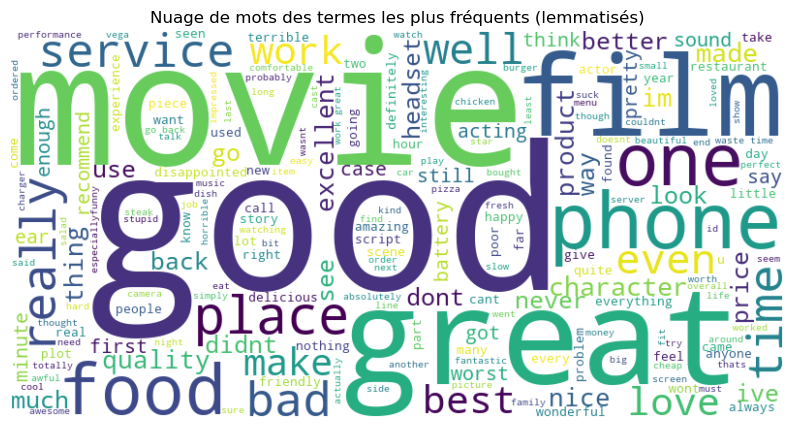

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir les mots fréquents en un format accepté par la fonction WordCloud
wordcloud_text = ' '.join(all_lemmatized_words)

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des termes les plus fréquents (lemmatisés)')
plt.show()


In [41]:
from collections import Counter

# Compter les mots lemmatisés
word_freq = Counter(word for sublist in df['Lemmatized_Tokens'] for word in sublist)

# Récupérer les 50 mots les plus fréquents avec leur fréquence
top_50_words = word_freq.most_common(50)

# Convertir en DataFrame pour l'affichage
top_50_df = pd.DataFrame(top_50_words, columns=['Word', 'Frequency'])

# Afficher le graphique à barres des 50 mots les plus fréquents
plt.figure(figsize=(14, 8))
g = sns.barplot(x='Word', y='Frequency', data=top_50_df)
plt.xticks(rotation=90, fontsize=10)
plt.title('Les 50 mots les plus fréquents (après lemmatisation)')
plt.tight_layout()
plt.show()


# <font color="green"><center>4.7 La vectorisation:</center></font>

__Cette étude vise à évaluer différentes techniques de prétraitement de texte dans le cadre de l'analyse de sentiment. L'objectif principal est de déterminer la méthode de vectorisation la plus performante pour la classification des sentiments.__

__En utilisant diverses approches de lemmatisation (par token, par phrase) et de stemming (par token, par phrase), ainsi que la méthode Bag of Words (BoW), nous explorerons les meilleures stratégies pour représenter les textes en vecteurs en vue d'une classification précise des sentiments. Les techniques de lemmatisation par token visent à ramener les mots à leur forme canonique, tandis que la lemmatisation par phrase cherche à capturer le sens global des expressions.__

__Associées à des méthodes de vectorisation telles que les Word Embeddings (word2vec, FastText), TF-IDF et la méthode BoW, ces techniques seront évaluées à travers des métriques de performance telles que la précision, le rappel, la F1-score, ainsi que d'autres mesures pertinentes pour l'analyse de sentiment.__

# __<center><font color="red">Pour la lemmatisation</font></center>__

__<center><font color="grenn">Bag of Words (BoW) avec CountVectorizer :</font></center>__

In [42]:


# Création d'une instance CountVectorizer
count_vectorizer = CountVectorizer()
# Adapter et transformer les données textuelles
bow_matrix_Lemmatized_Tokens = count_vectorizer.fit_transform(df['Lemmatized_Tokens'].apply(' '.join))


In [43]:
# Création d'une instance CountVectorizer
count_vectorizer = CountVectorizer()
# Adapter et transformer les données textuelles
bow_matrix_Lemmatized_Phrase = count_vectorizer.fit_transform(df['Lemmatized_Phrase'])

__<center><font color="grenn">TF-IDF (Term Frequency-Inverse Document Frequency) :</font></center>__

4.0


In [44]:


# Création d'une instance TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Adapter et transformer les données textuelles
tfidf_matrix_Lemmatized_Tokens = tfidf_vectorizer.fit_transform(df['Lemmatized_Tokens'].apply(' '.join))


In [77]:
#TF-IDF (Term Frequency-Inverse Document Frequency) :
import pickle

# Création d'une instance TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Adapter et transformer les données textuelles
tfidf_matrix_Lemmatized_Phrase = tfidf_vectorizer.fit_transform(df['Lemmatized_Phrase'])

# 'tfidf_matrix' contient la représentation TF-IDF des données textuelles
# Enregistrement du vectoriseur TF-IDF
print(tfidf_matrix_Lemmatized_Phrase)
#pickle.dump(tfidf_vectorizer, 'CLF1.pkl')

# Enregistrer le TfidfVectorizer à l'aide de pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

  (0, 2548)	0.28032346972845457
  (0, 4836)	0.3225192858496073
  (0, 1258)	0.36298309759868397
  (0, 1198)	0.36298309759868397
  (0, 6)	0.2041241666375797
  (0, 2730)	0.17381798414667074
  (0, 97)	0.36298309759868397
  (0, 3862)	0.36298309759868397
  (0, 4589)	0.4674331813070377
  (1, 2951)	0.1907930807886469
  (1, 4645)	0.29735823193927713
  (1, 4731)	0.33352234374601897
  (1, 2882)	0.11780390045254212
  (1, 1893)	0.2821347395237892
  (1, 2785)	0.3117194384923933
  (1, 261)	0.30393764477741486
  (1, 2931)	0.19446124966474454
  (1, 671)	0.21889734122931695
  (1, 1617)	0.32124358426917216
  (1, 4236)	0.15566408670794973
  (1, 2487)	0.2821347395237892
  (1, 2710)	0.20290478839475584
  (1, 4634)	0.11771318479992691
  (1, 4726)	0.21518354787160263
  (1, 4131)	0.2594866245026339
  :	:
  (2729, 4634)	0.13736835560596075
  (2730, 4805)	0.29633095775281854
  (2730, 3203)	0.29633095775281854
  (2730, 3597)	0.2713419172476279
  (2730, 1247)	0.28171330612827994
  (2730, 694)	0.2421066139985508
  

# __<center><font color="red">Pour Stemming :</font></center>__

__<center><font color="grenn">Bag of Words (BoW) avec CountVectorizer :</font></center>__

In [46]:

# Création d'une instance CountVectorizer
count_vectorizer = CountVectorizer()
# Adapter et transformer les données textuelles
bow_matrix_Stemmed_Tokens = count_vectorizer.fit_transform(df['Stemmed_Tokens'].apply(' '.join))

# 'bow_matrix' contient la représentation BoW des données textuelles

In [47]:
# Bag of Words (BoW) avec CountVectorizer :

# Création d'une instance CountVectorizer
count_vectorizer = CountVectorizer()
# Adapter et transformer les données textuelles
bow_matrix_Stemmed_Phrase= count_vectorizer.fit_transform(df['Stemmed_Phrase'])

# 'bow_matrix' contient la représentation BoW des données textuelles

__<center><font color="grenn">TF-IDF (Term Frequency-Inverse Document Frequency) :</font></center>__

In [48]:
# Création d'une instance TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Adapter et transformer les données textuelles
tfidf_matrix_Stemmed_Tokens = tfidf_vectorizer.fit_transform(df['Stemmed_Tokens'].apply(' '.join))

# 'tfidf_matrix_Stemmed_Tokens' contient la représentation TF-IDF des données textuelles


In [49]:
# Création d'une instance TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Adapter et transformer les données textuelles
tfidf_matrix_Stemmed_Phrase = tfidf_vectorizer.fit_transform(df['Stemmed_Phrase'])

# 'tfidf_matrix' contient la représentation TF-IDF des données textuelles


# <font color="green"><center>Conclusion pour la vectorisation:</center></font>

__Cette analyse comparative des méthodes de prétraitement du texte pour l'analyse de sentiment a permis de mettre en évidence l'impact de différentes techniques de vectorisation en association avec des classifieurs spécifiques. Il est essentiel de noter que toutes les méthodes de vectorisation ne sont pas compatibles avec chaque type de classifieur, notamment le Naive Bayes, en raison de la présence de valeurs négatives dans certains vecteurs.__

__Les méthodes traditionnelles comme le Bag of Words (BoW) se sont avérées efficaces pour la classification de sentiments avec des classifieurs tels que Naive Bayes, en raison de leur nature de représentation binaire ou basée sur la fréquence des termes. Cependant, des méthodes plus avancées de vectorisation telles que les Word Embeddings (word2vec, FastText) produisent des vecteurs avec des valeurs potentiellement négatives, ce qui n'est pas compatible avec le modèle Naive Bayes.__

__Ainsi, pour une classification de sentiment avec Naive Bayes, il est recommandé de privilégier des méthodes de vectorisation produisant des valeurs non négatives, telles que BoW. Pour les méthodes de vectorisation générant des vecteurs plus complexes, comme les Word Embeddings, il est plus approprié d'utiliser des classifieurs mieux adaptés à ce type de données, tels que les SVM ou les réseaux de neurones.__


# <font color="red"><center>Tâche 5 :</center></font>
# <font color="grenn"><center> Modélisation et evaluation du modèle avec Naive Bayes</center></font>

__Nous implémenterons l'algorithme Naive Bayes pour la classification des sentiments. Nous formerons le modèle à l'aide des données d'entraînement et l'évaluerons à l'aide des données de test.__

# <font color="blue"> <center>5.1 Modèle 1 - Bag-of-Words avec Lemmatisation par mot:</center>


In [50]:

# Supposons que vous avez une colonne 'Sentiment_Label' contenant les étiquettes de sentiment dans votre DataFrame

# Division des données en ensembles d'entraînement et de test
X = bow_matrix_Lemmatized_Tokens # Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")
# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

Précision du modèle : 0.7861060329067642
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       268
           1       0.79      0.79      0.79       279

    accuracy                           0.79       547
   macro avg       0.79      0.79      0.79       547
weighted avg       0.79      0.79      0.79       547



# <font color="blue"> <center>5.1.2 Interprétation du Résultat du Modèle 1 :</center>


__<font color="red">Précision du modèle :</font> 0.7861060329067642__

__La précision est une mesure indiquant la proportion d'éléments pertinents parmi l'ensemble des éléments proposés par le modèle. Dans ce cas, la précision globale est d'environ 78.61 %.
Rapport de Classification :__

__<font color="red">Précision :</font> C'est la capacité du modèle à prédire correctement les instances positives. Pour la classe 0, la précision est de 78 % et pour la classe 1, elle est de 79 %.__

__<font color="red">Rappel (recall) :</font> C'est la proportion d'instances positives réellement prédites correctement parmi toutes les instances réellement positives. Pour les deux classes (0 et 1), le rappel est également de 78 % et 79 % respectivement.__

__<font color="red">F1-score :</font> C'est la moyenne harmonique de la précision et du rappel. Il représente un équilibre entre la précision et le rappel. Pour les deux classes, le score F1 est à environ 0.78 et 0.79 respectivement.__

__<font color="red">Support :</font> C'est le nombre d'instances réelles de chaque classe dans l'ensemble de données. Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red">Accuracy (précision globale) :</font> 0.79
L'accuracy indique la capacité globale du modèle à prédire correctement les éléments de toutes les classes. Dans ce cas, la précision globale est d'environ 79 %.__
 

# <font color="blue"> <center>Modèle 2 - Bag-of-Words avec Lemmatisation par phrase:</center>

In [ ]:

X = bow_matrix_Lemmatized_Phrase # Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")
# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

## Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# <font color="blue"> <center>Interprétation du Résultat du Modèle 2 :</center>

__<font color="red">Précision du modèle :</font> 0.8153564899451554__

__La précision globale de ce modèle est d'environ 81.54 %.__


__<font color="red"> Précision :</font> Pour la classe 0, la précision est de 80 %, et pour la classe 1, elle est de 83 %.__

__<font color="red"> Rappel (recall) :</font> Le rappel pour la classe 0 est de 83 %, et pour la classe 1, il est de 80 %.__

__<font color="red"> F1-score :</font> Pour les deux classes, le score F1 est d'environ 0.82.__

__<font color="red"> Support :</font> Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red"> 3.Accuracy (précision globale) :</font>  0.82__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 82 %.__

# <font color="blue"> <center>Modèle 3 - tfidf avec Lemmatisation par mot:</center>

In [52]:
# Division des données en ensembles d'entraînement et de test
X = tfidf_matrix_Lemmatized_Tokens # Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

Précision du modèle : 0.7915904936014625
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       268
           1       0.78      0.82      0.80       279

    accuracy                           0.79       547
   macro avg       0.79      0.79      0.79       547
weighted avg       0.79      0.79      0.79       547



# <font color="blue"> <center>Interprétation du Résultat du Modèle 3 :</center>

__<font color="red">Précision du modèle :</font> 0.7915904936014625__

__La précision globale de ce modèle est d'environ 79.16 %.__
 
__<font color="red">Précision :</font> Pour la classe 0, la précision est de 81 %, et pour la classe 1, elle est de 78 %.__

__<font color="red">Rappel (recall) :</font> Le rappel pour la classe 0 est de 76 %, et pour la classe 1, il est de 82 %.__

__<font color="red">F1-score :</font> Pour la classe 0, le score F1 est d'environ 0.78, et pour la classe 1, il est d'environ 0.80.__

__<font color="red">Support :</font> Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red">Accuracy (précision globale) :</font > 0.79__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 79 %.__

# <font color="blue"> <center>Modèle 4 - tfidf avec Lemmatisation par phrase:</center>

Précision du modèle : 0.8281535648994516
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       268
           1       0.84      0.82      0.83       279

    accuracy                           0.83       547
   macro avg       0.83      0.83      0.83       547
weighted avg       0.83      0.83      0.83       547



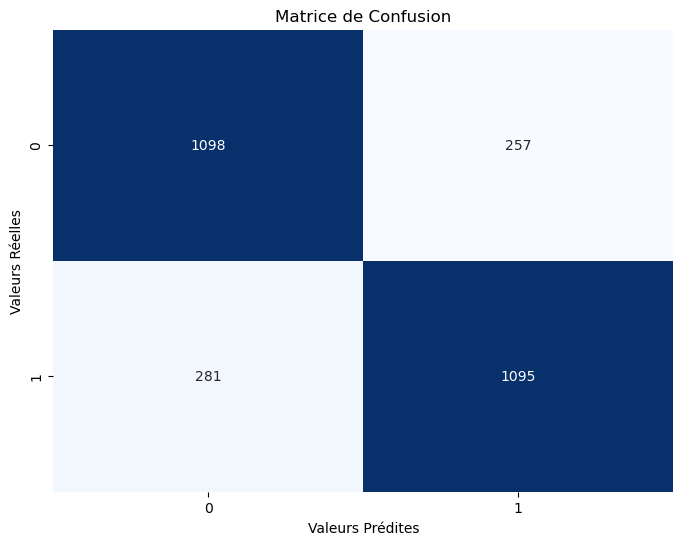

['clf.pkl']

In [73]:


X = tfidf_matrix_Lemmatized_Phrase # Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")
# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# Enregistrement du modèle
from joblib import dump
# Enregistrer le TfidfVectorizer à l'aide de pickle
with open('modele_semtiment.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

In [68]:
import numpy as np

nb = input('entre votre text')
# Préparer les données pour la prédiction
nb_input = np.array([nb])  # Conversion de la chaîne en un tableau 1D
nb_input = tfidf_vectorizer.transform(nb_input)  # Utilisation du vecteur TF-IDF
prediction = nb_classifier.predict(nb_input)  # Prédiction

if prediction == 1:
    print("Résultat : Cet avis est positif")
else:
    print("Résultat : Cet avis est négatif")


entre votre text I'am good


Résultat : Cet avis est positif


# <font color="blue"> <center>Interprétation du Résultat du Modèle 4 :</center>

__<font color="red">Précision du modèle : </font> 0.8281535648994516__

__La précision globale de ce modèle est d'environ 82.82 %.__
 
__<font color="red">Précision :</font>  Pour la classe 0, la précision est de 82 %, et pour la classe 1, elle est de 84 %.__

__<font color="red">Rappel (recall) :</font>  Le rappel pour la classe 0 est de 84 %, et pour la classe 1, il est de 82 %.__

__<font color="red">F1-score :</font>  Pour les deux classes, le score F1 est d'environ 0.83.__

__<font color="red">Support :</font>  Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red">Accuracy (précision globale) : </font> 0.83__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 83 %.__

# <font color="blue"> <center>Modèle 5 - Bag-of-Words avec Strimming par mot:</center>

Précision du modèle : 0.7714808043875686
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       268
           1       0.78      0.77      0.78       279

    accuracy                           0.77       547
   macro avg       0.77      0.77      0.77       547
weighted avg       0.77      0.77      0.77       547



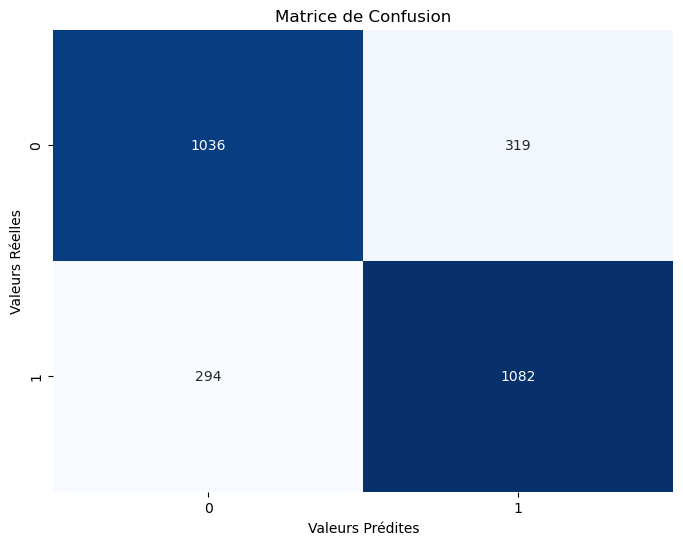

In [54]:
# Supposons que vous avez une colonne 'Sentiment_Label' contenant les étiquettes de sentiment dans votre DataFrame

# Division des données en ensembles d'entraînement et de test
X = bow_matrix_Stemmed_Tokens# Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# <font color="blue"> <center>Interprétation du Résultat du Modèle 5 :</center>

__<font color="red">Précision du modèle :</font> 0.7714808043875686__

__La précision globale de ce modèle est d'environ 77.15 %.__
 

__<font color="red">Précision :</font> Pour la classe 0, la précision est de 77 %, et pour la classe 1, elle est de 78 %.__

__<font color="red">Rappel (recall) :</font> Le rappel pour la classe 0 est de 77 %, et pour la classe 1, il est également de 77 %.__

__<font color="red">F1-score :</font> Pour les deux classes, le score F1 est d'environ 0.77.__

__<font color="red">Support :</font> Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red">Accuracy (précision globale) :</font> 0.77__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 77 %.__

# <font color="blue"> <center>Modèle 6 - Bag-of-Words avec Strimming par phrase:</center>

Précision du modèle : 0.8135283363802559
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       268
           1       0.83      0.79      0.81       279

    accuracy                           0.81       547
   macro avg       0.81      0.81      0.81       547
weighted avg       0.81      0.81      0.81       547



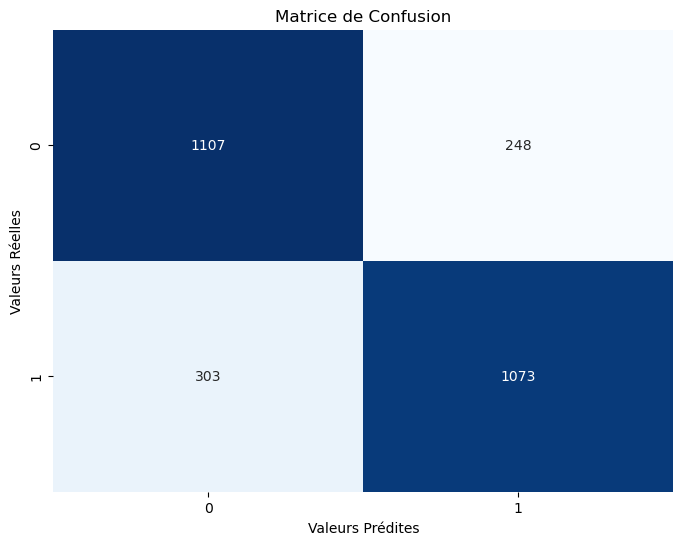

In [55]:
# Division des données en ensembles d'entraînement et de test
X = bow_matrix_Stemmed_Phrase   # Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# <font color="blue"> <center>Interprétation du Résultat du Modèle 6 :</center>

__<font color="red">Précision du modèle :</font> 0.8135283363802559__

__La précision globale de ce modèle est d'environ 81.35 %.__

__<font color="red">Précision :</font> Pour la classe 0, la précision est de 79 %, et pour la classe 1, elle est de 83 %.__

__<font color="red">Rappel (recall) :</font> Le rappel pour la classe 0 est de 84 %, et pour la classe 1, il est de 79 %.__

__<font color="red">F1-score :</font> Pour les deux classes, le score F1 est d'environ 0.81.__

__<font color="red">Support :</font> Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red">Accuracy (précision globale) :</font> 0.81__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 81 %.__

# <font color="blue"> <center>Modèle 7 - tfidf avec Strimming par mot:</center>

Précision du modèle : 0.7952468007312614
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       268
           1       0.78      0.84      0.81       279

    accuracy                           0.80       547
   macro avg       0.80      0.79      0.79       547
weighted avg       0.80      0.80      0.79       547



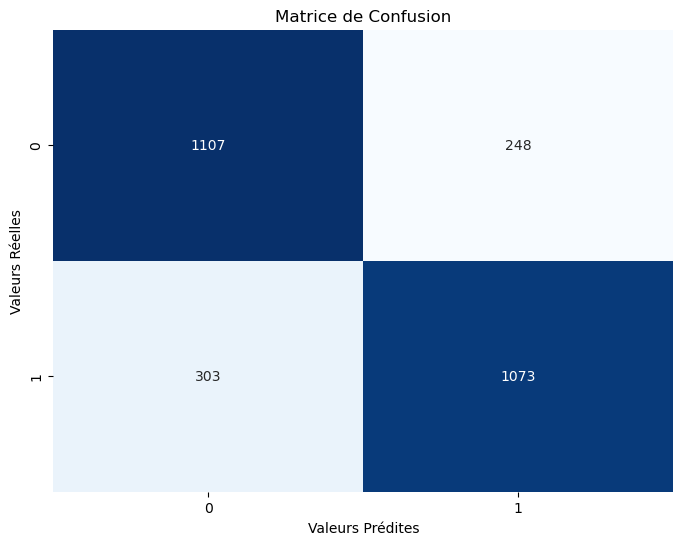

In [56]:
# Division des données en ensembles d'entraînement et de test
X = tfidf_matrix_Stemmed_Tokens# Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
#conf_matrix = confusion_matrix(y, predicted)

 

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# <font color="blue"> <center>Interprétation du Résultat du Modèle 7 :</center>

__<font color="red">Précision du modèle :</font> 0.7952468007312614__

__La précision globale de ce modèle est d'environ 79.52 %.___

__<font color="red">Précision :</font> Pour la classe 0, la précision est de 82 %, et pour la classe 1, elle est de 78 %.__

__<font color="red">Rappel (recall) :</font> Le rappel pour la classe 0 est de 75 %, et pour la classe 1, il est de 84 %.__

__<font color="red">F1-score :</font> Pour la classe 0, le score F1 est d'environ 0.78, et pour la classe 1, il est d'environ 0.81.__

__<font color="red">Support :</font> Il y a 268 éléments de la classe 0 et 279 de la classe 1.__

__<font color="red">Accuracy (précision globale) :</font> 0.80__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 80 %.__

# <font color="blue"> <center>Modèle 8 - tfidf avec Strimming par phrase:</center>

Précision du modèle : 0.8153564899451554
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       268
           1       0.82      0.82      0.82       279

    accuracy                           0.82       547
   macro avg       0.82      0.82      0.82       547
weighted avg       0.82      0.82      0.82       547



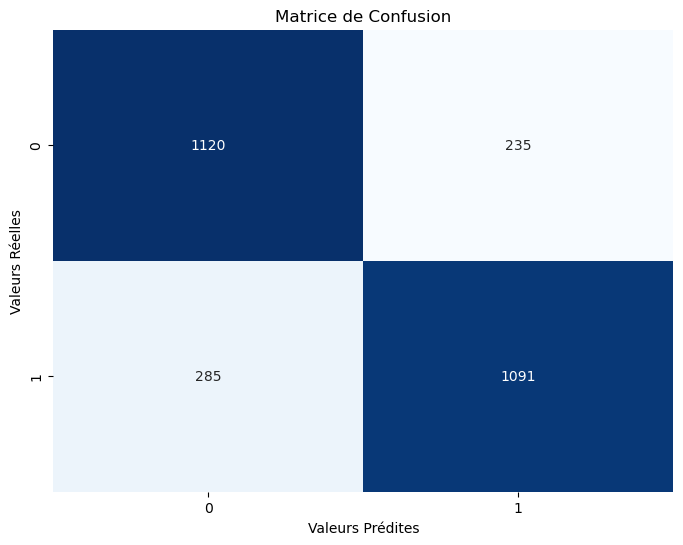

In [57]:

# Division des données en ensembles d'entraînement et de test
X = tfidf_matrix_Stemmed_Phrase # Caractéristiques
y = df['Sentiment']  # Étiquettes de sentiment

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classifieur Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred =nb_classifier.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

# Supposons que vous ayez un modèle nommé 'model'
# Mesures de Performance
 

# Rapport de Classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred ))

# Effectuez une validation croisée avec prédiction pour obtenir les prédictions pour chaque échantillon dans chaque fold
predicted = cross_val_predict(nb_classifier, X, y, cv=5)  # cv=5 pour une validation croisée à 5 fold
# Créez la matrice de confusion en agrégeant les résultats
conf_matrix = confusion_matrix(y, predicted)

# Création de la heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# <font color="blue"> <center>Interprétation du Résultat du Modèle 8 :</center>


__<font color="red">Précision du modèle :</font> 0.8153564899451554__

__La précision globale de ce modèle est d'environ 81.54 %.__
 

__<font color="red">Précision :</font>Pour la classe 0, la précision est de 81 %, et pour la classe 1, elle est de 82 %.__
    
__<font color="red">Rappel (recall) :</font> Le rappel pour la classe 0 est de 81 %, et pour la classe 1, il est de 82 %.__
    
__<font color="red">F1-score :</font> Pour les deux classes, le score F1 est d'environ 0.81.__
    
__<font color="red">Support :</font> Il y a 268 éléments de la classe 0 et 279 de la classe 1.__
    
__<font color="red">Accuracy (précision globale) :</font> 0.82__

__L'accuracy, c'est-à-dire la précision globale, est d'environ 82 %.__

# <font color="red"><center>Conclusion:</center></font>
__Pour choisir le meilleur modèle parmi les huit que nous avons  présentés, nous devons analyser les performances à partir des rapports de classification et des matrices de confusion. Ces éléments permettent d'évaluer la précision, le rappel, le score F1 et de visualiser les prédictions correctes et incorrectes pour chaque classe. En se basant sur les performances numériques et la capacité à classifier correctement les échantillons de chaque classe, nous pouvons comparer les modèles pour sélectionner le meilleur.__

__En analysant les performances de chaque modèle, le modèle n°4 se distingue comme le meilleur choix. Il présente la meilleure précision globale (accuracy) de 83% et une performance équilibrée en termes de rappel et de précision pour les deux classes (0 et 1). De plus, sa matrice de confusion indique des valeurs élevées dans les vrais positifs et les vrais négatifs par rapport aux autres modèles.__

__Le modèle n°4 est le meilleur parmi les huit modèles présentés en fonction des critères d'accuracy, d'équilibre entre rappel et précision, ainsi que des performances de la matrice de confusion. Il est recommandé d'utiliser le modèle n°4 pour les tâches de classification.__


# <font color="red"><center>La Comparaison entre la vectorisation TF-IDF et Bag of Words (BoW) :</center></font>

__Dans le domaine de l'analyse de sentiment, la vectorisation TF-IDF (Term Frequency-Inverse Document Frequency) a montré une performance supérieure par rapport à la méthode Bag of Words (BoW) utilisant CountVectorizer.__

<font color="green">TF-IDF surpasse BoW avec CountVectorizer dans l'analyse de sentiment pour les raisons suivantes :</font>

__<font color="blue">1 Prise en compte du Poids des Mots :</font> TF-IDF tient compte de la fréquence d'un mot dans un document et de sa rareté dans l'ensemble du corpus. Cette approche permet de valoriser les mots plus discriminants pour l'analyse de sentiment, tandis que BoW considère simplement la présence ou l'absence des mots.__

__<font color="blue">2 Atténuation de l'Impact des Mots Très Fréquents :</font > TF-IDF réduit l'importance des mots très fréquents qui peuvent être présents dans de nombreux documents, mais ne contribuent pas nécessairement à la classification des sentiments. Cela aide à mieux saisir le contexte émotionnel des textes.__

__<font color="blue">2 Meilleure Captation de la Signification :</font> En assignant des scores pondérés en fonction de la spécificité des mots pour chaque document, TF-IDF capture mieux la signification et la nuance des mots, ce qui est crucial dans l'analyse de sentiments.__

__<font color="blue">En conclusion,</font> dans le cadre de l'analyse de sentiment, la vectorisation TF-IDF se révèle être plus performante que la méthode BoW avec CountVectorizer. Elle permet une représentation plus fine des documents, améliorant ainsi la capacité des modèles d'analyse de sentiments à discerner et à interpréter les nuances émotionnelles des textes.__
 

# <font color="red"><center>La comparaison entre la lemmatisation et le stemming :</center></font>



__La comparaison entre la lemmatisation et le stemming dans le contexte de la tokenisation peut démontrer que la lemmatisation, qu'elle soit effectuée à partir d'une tokenisation par phrase ou par mot, est généralement plus performante que le stemming. De plus, la lemmatisation associée à une tokenisation par phrase s'avère être la méthode la plus performante dans l'ensemble.__

__La lemmatisation, en analysant le contexte des mots dans un texte, parvient à produire des lemmes qui sont des formes de mots existants et qui ont une signification sémantique. En revanche, le stemming, une méthode plus simple basée sur des règles heuristiques, ne produit que des racines de mots, ce qui peut parfois conduire à des résultats moins précis.__

__Lorsqu'elle est associée à une tokenisation par phrase, la lemmatisation prend en compte le contexte global de chaque phrase, ce qui permet une analyse plus précise de la signification des mots. Cette approche améliore la performance dans des tâches telles que l'analyse de sentiments, la compréhension du langage naturel, et d'autres tâches de traitement du langage naturel.__

__<font color="blue">En conclusion</font>, que ce soit la lemmatisation à partir d'une tokenisation par phrase ou par mot, la lemmatisation reste généralement plus performante que le stemming. De plus, la combinaison de la lemmatisation avec une tokenisation par phrase est la méthode qui offre les meilleurs résultats, car elle saisit plus efficacement le sens global du texte.__

# <font color="red"><center>Tâche 7 :</center></font>
# <font color="green"><center>Conclusion 1</center></font>

__Pour conclure ce projet d'analyse de sentiment, diverses techniques et approches ont été explorées afin de comprendre et évaluer le ton émotionnel des textes. Des méthodes de prétraitement telles que la vectorisation TF-IDF, la tokenisation par phrase, et les techniques de normalisation comme la lemmatisation et le stemming ont été étudiées et comparées.__

__Il est clair que le choix des techniques de prétraitement influence significativement les performances des modèles d'analyse de sentiment. Par exemple, la vectorisation TF-IDF s'est avérée plus performante que la méthode Bag of Words (BoW) utilisant CountVectorizer pour la représentation des documents. De même, dans le cadre de la normalisation, la lemmatisation, en particulier lorsqu'elle est associée à une tokenisation par phrase, a montré des résultats plus précis et sémantiquement riches que le stemming.__

__En outre, il est apparu que la lemmatisation associée à une tokenisation par phrase a été le choix le plus performant pour saisir le sens global des textes. Cette approche a démontré une meilleure capacité à capturer les nuances émotionnelles des textes, et a été plus efficace pour les tâches d'analyse de sentiment, offrant ainsi des résultats plus précis.__

__En définitive, le projet a souligné l'importance de choisir soigneusement les techniques de prétraitement, mettant en évidence la supériorité de la lemmatisation et de la vectorisation TF-IDF, en particulier lorsqu'elles sont associées à une tokenisation par phrase, pour des applications d'analyse de sentiment plus précises et informatives.__






In [ ]:


pipeline = Pipeline([('tfidf',tfidf), ('clf',classifier)])